# How to merge 2 hyperspectral images?

Here I have two hyperspectral images with an overlapping area in them. 

**My goal** is to merge them into one in a way that delete all the overlapping parts and than present NDVI map

In [1]:
!pip install spectral
import spectral.io.envi as envi
from pathlib import Path
from spectral import *
import matplotlib.pyplot as plt
import skimage.io as io
from skimage import transform
import skimage
import numpy as np
import pandas as pd
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Read the images and present RGB image:

In [2]:
path1 = '/content/drive/MyDrive/Greenwall/HyperSpectral_images/28_07_2022/REFLECTANCE_1388.hdr' #path to image
img1 =  open_image(path1) 
print(img1)

	Data Source:   '/content/drive/MyDrive/Greenwall/HyperSpectral_images/28_07_2022/REFLECTANCE_1388.dat'
	# Rows:            512
	# Samples:         512
	# Bands:           204
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32


ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0026881720405071974, 1.0767678022384644]
    G: [0.0037464320193976164, 1.0889629125595093]
    B: [0.0036420393735170364, 1.1308531761169434]

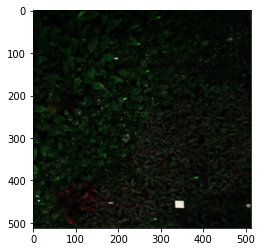

In [3]:
red = 97 #680 nm band 97
green = 53 # 550 nm
blue = 30 # 410
nir = 140 # 810 nm
yellow = 46  #532 nm

# 3 bands into new image
RGB_Image = np.dstack([img1[:,:,red],img1[:,:,green],img1[:,:,blue]])#RGB  color composite
imshow(RGB_Image)

# present the oroginal image with this bands
# v= imshow(img1,(98,53,30))

	Data Source:   '/content/drive/MyDrive/Greenwall/HyperSpectral_images/28_07_2022/REFLECTANCE_1389.dat'
	# Rows:            512
	# Samples:         512
	# Bands:           204
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32


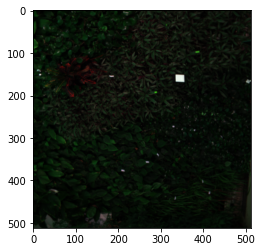

In [4]:
path2 = '/content/drive/MyDrive/Greenwall/HyperSpectral_images/28_07_2022/REFLECTANCE_1389.hdr'
img2 =  open_image(path2)
print(img2)

# present the oroginal image with this bands
v= imshow(img2,(98,53,30))

## 2. Rotate the images

The output of my camera is rotated image so i want to rotate it to the left side. I will use the ``` np.rot90 ``` function:

Note that we need to use the image as a numpy array (``` img[:,:,:] ```) and not in the original image ( ``` img[:,:,:] ```)






ImageView object:
  Display bands       :  (98, 53, 30)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.004117647185921669, 1.0831043720245361]
    G: [0.004162702243775129, 1.041091799736023]
    B: [0.005457380320876837, 1.0825961828231812]

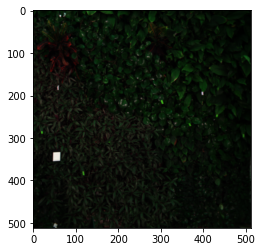

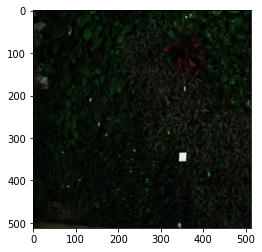

In [6]:
# Rotate the right side of the green wall:
right_side = np.rot90(img1[:,:,:],3)
imshow(right_side,(98,53,30))

# Rotate the right side of the green wall:
left_side = np.rot90(img2[:,:,:],3)
imshow(left_side,(98,53,30))

## 3. Merge the images into one

ImageView object:
  Display bands       :  (98, 53, 30)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.002745098201557994, 1.0657843351364136]
    G: [0.0037464320193976164, 1.0889629125595093]
    B: [0.0036420393735170364, 1.1308531761169434]

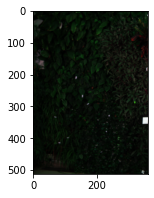

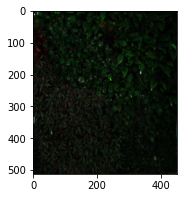

In [7]:
imshow(left_side[:,0:360,:],(98,53,30),figsize=(3,3))
imshow(right_side[:,60:,:],(98,53,30),figsize=(3,3))

ImageView object:
  Display bands       :  (98, 53, 30)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.002745098201557994, 1.0666208267211914]
    G: [0.0037464320193976164, 1.0889629125595093]
    B: [0.0036420393735170364, 1.1308531761169434]

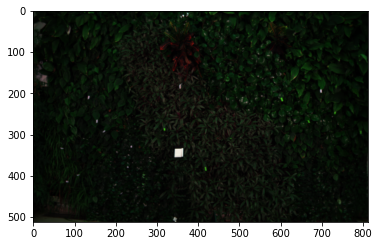

In [8]:
left_array = left_side[:,0:360,:]
right_array = right_side[:,60:,:]

# Merge the images:
merged = np.hstack((left_array, right_array))
imshow(merged,(98,53,30))

NDVI build-in function

$$NDVI = \frac{NIR-Red}{NIR+Red}$$

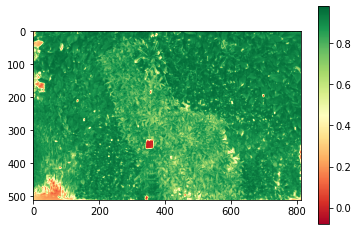

In [32]:
vi = ndvi(merged, red, nir) #nir-red/ nir+red
plt.imshow(vi,cmap="RdYlGn")
plt.colorbar() 